Have you ever trained a machine learning model and thought, “Okay, it works… but why does it work?” Or maybe you’ve been asked, “Why did the model make this prediction?” and found yourself fumbling for an answer.

Well, you’re not alone. Machine learning models can feel like mysterious black boxes sometimes. But today, we’re going to crack that box open with SHAP (SHapley Additive exPlanations). SHAP is like a detective for your model—it tells you exactly how each feature contributes to a prediction

Load the California Housing dataset.

Train a simple linear regression model.

Use SHAP to explain the model’s predictions.

Create four awesome visualizations to understand feature importance and individual predictions.

By the end, you’ll not only understand your model better but also have some cool visualizations to show off.

In [9]:
!pip install shap

  Using cached shap-0.46.0-cp312-cp312-win_amd64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
Using cached shap-0.46.0-cp312-cp312-win_amd64.whl (456 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)


In [10]:
# --- NUMERICAL COMPUTATION ---
import numpy as np  # Provides fast array operations and random number functions

# --- DATA MANIPULATION ---
import pandas as pd  # Allows us to work with tabular (DataFrame) data

# --- PLOTTING LIBRARIES ---
import matplotlib.pyplot as plt  # Essential for creating plots
import seaborn as sns  # Enhances the aesthetics of our matplotlib plots

# --- MODELING LIBRARY ---
from sklearn.linear_model import LinearRegression  # Implements simple linear models

# --- MODEL EXPLANATION ---
import shap  # Enables us to explain machine learning predictions using SHAP values

# Set a fixed seed to ensure our results are reproducible every time we run the script.
np.random.seed(42)

Why these libraries?

NumPy & Pandas: To handle and manipulate data.

Matplotlib & Seaborn: To create beautiful visualizations.

scikit-learn: To train a simple, interpretable linear regression model.

SHAP: The star of the show—used to explain model predictions.

--------------------------------------

Let’s load the California Housing dataset. This dataset contains information about housing blocks in California, such as median income, house age, and population.

In [11]:
# Load the California Housing dataset
X, y = shap.datasets.california(n_points=1000)

# Create a background dataset for SHAP analysis
# This background dataset is used to estimate the expected values when features are "missing" in SHAP value calculation
X_background = shap.utils.sample(X, 100)

shap.datasets.california: Loads the dataset.

X: The features (e.g., median income, house age).

y: The target variable (median house value).

X_background: A smaller sample of the data used by SHAP to calculate expected predictions.

-----------------------

Training the Model
Now that we have the data, let’s train a simple linear regression model.

In [12]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

LinearRegression()

It’s simple and interpretable.

Each feature gets a coefficient, which tells us how much it contributes to the prediction.

---------------------------

Analyzing Model Coefficients
Here’s a question: Which features matter the most in predicting house prices?

Let’s look at the model’s coefficients to find out

In [13]:
print("Model Coefficients:")
for idx, feature in enumerate(X.columns):
    coef = model.coef_[idx]
    direction = "increases" if coef > 0 else "decreases"
    print(f"{feature}: {coef:.5f} ({direction} house value)")

Model Coefficients:
MedInc: 0.42563 (increases house value)
HouseAge: 0.01033 (increases house value)
AveRooms: -0.11610 (decreases house value)
AveBedrms: 0.66385 (increases house value)
Population: 0.00003 (increases house value)
AveOccup: -0.26096 (decreases house value)
Latitude: -0.46734 (decreases house value)
Longitude: -0.46272 (decreases house value)


A positive coefficient means the feature increases house value.

A negative coefficient means the feature decreases house value.

For example, if the coefficient for MedInc (median income) is 0.5, it means that for every 1-unit increase in MedInc, the predicted house value increases by 0.5 units

-----------------------



In [14]:
# Create a SHAP KernelExplainer using our model’s predict function, with the background dataset.
explainer = shap.KernelExplainer(model.predict, X_background)

KernelExplainer: Works with any model (even non-linear ones).

Background dataset: Helps SHAP calculate the expected prediction when features are “missing.

In [15]:
# Compute SHAP values for the first 100 samples
X_display = X.iloc[:100]
shap_values = explainer.shap_values(X_display)

  0%|          | 0/100 [00:00<?, ?it/s]

Creating SHAP Visualizations
Let’s create some awesome visualizations to understand our model better.

SHAP Summary Plot
Question: Which features have the biggest impact on predictions

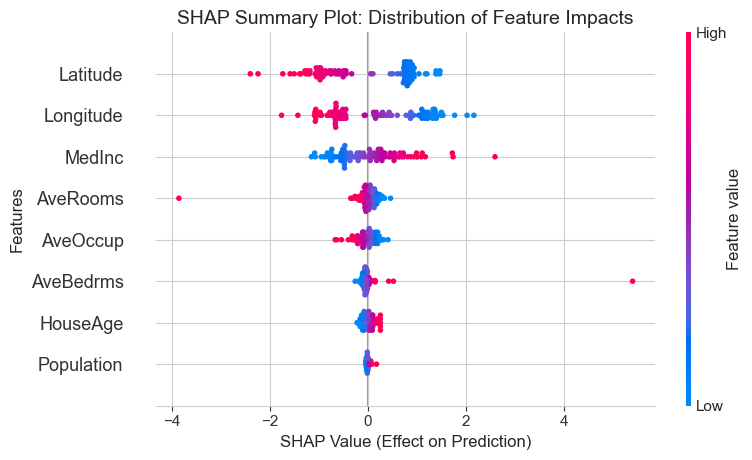

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values, X_display, show=False)
plt.title("SHAP Summary Plot: Distribution of Feature Impacts", fontsize=14)
plt.xlabel("SHAP Value (Effect on Prediction)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()

what does this plot show?
This plot is like a feature leaderboard. The most important features are at the top, and the least important ones are at the bottom. Each dot represents a single data point, and the position of the dot shows how much that feature influenced the prediction.

Red dots: High feature values.

Blue dots: Low feature values.

For example, if you look at MedInc (median income), you’ll see that higher values (red dots) tend to push predictions up, while lower values (blue dots) pull them down.

Partial Dependence Plot for Median Income
Question: How does median income affect house prices?

<Figure size 1400x1000 with 0 Axes>

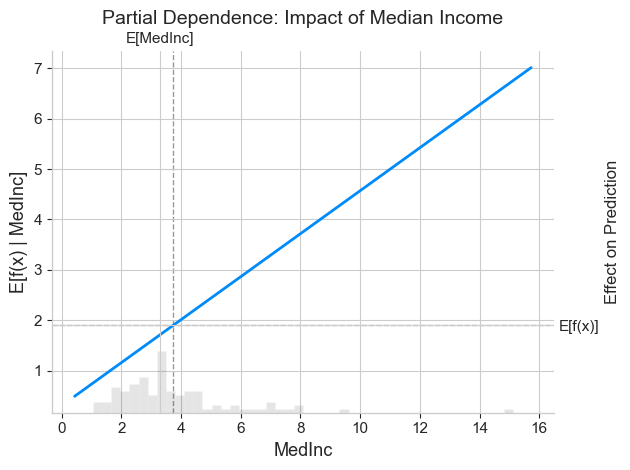

In [17]:
plt.figure(figsize=(14, 10))
shap.partial_dependence_plot("MedInc", model.predict, X_background,
                             ice=False, model_expected_value=True,
                             feature_expected_value=True, show=False)
plt.title("Partial Dependence: Impact of Median Income", fontsize=14)
plt.xlabel("Median Income (MedInc)", fontsize=12)
plt.ylabel("Effect on Prediction", fontsize=12)
plt.tight_layout()
plt.show()

what does this plot tell us?
The blue line shows how house prices change as median income increases. It’s almost perfectly straight, meaning the relationship is linear—when median income goes up, house prices go up proportionally.

The gray band around the line is the 95% confidence interval, showing the range of uncertainty in the predictions.

Feature Importance Bar Plot
Question: Which features are the most important overall

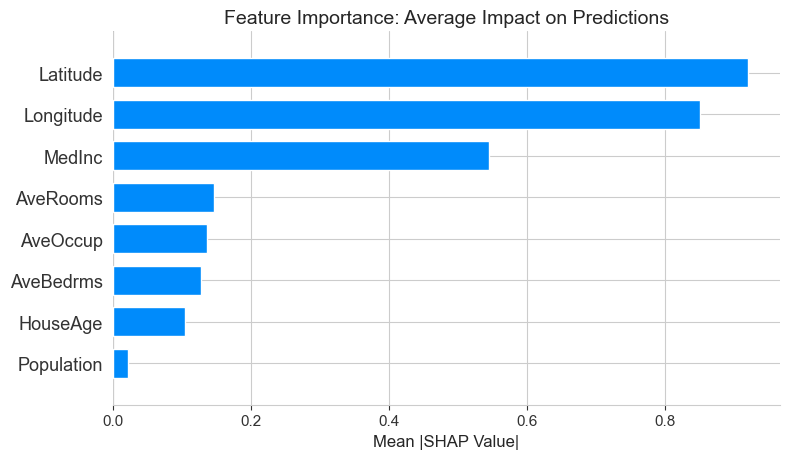

In [18]:
plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values, X_display, plot_type="bar", show=False)
plt.title("Feature Importance: Average Impact on Predictions", fontsize=14)
plt.xlabel("Mean |SHAP Value|", fontsize=12)
plt.tight_layout()
plt.show()

what’s happening here?
This plot ranks features by their average impact on predictions. Longer bars mean more important features. For example, Latitude and Longitude are the most important features in our model.

Force Plot for an Individual Prediction
Question: Why did the model make this specific prediction

<Figure size 1600x600 with 0 Axes>

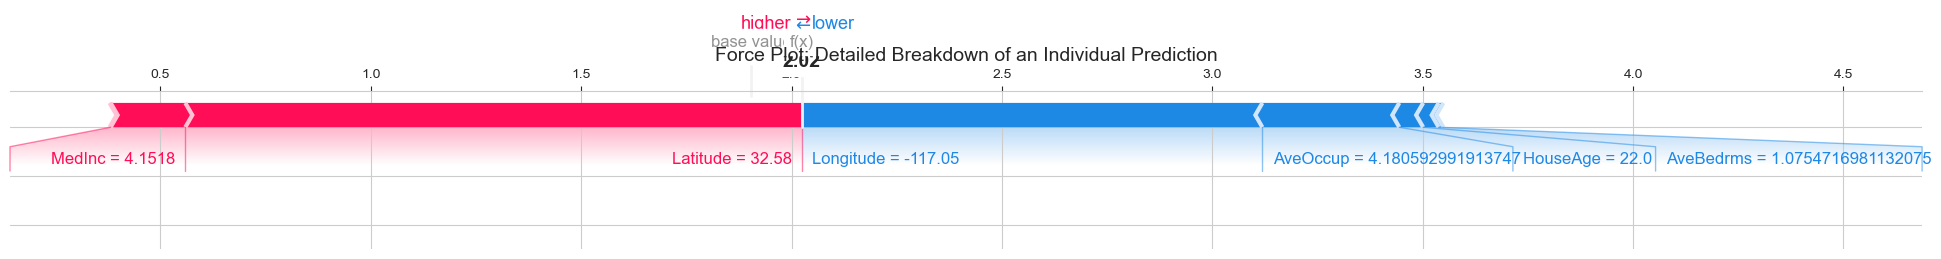

In [19]:
plt.figure(figsize=(16, 6))
shap.force_plot(explainer.expected_value, shap_values[0], X_display.iloc[0],
                matplotlib=True, show=False, text_rotation=0)
plt.title("Force Plot: Detailed Breakdown of an Individual Prediction", fontsize=14)
plt.tight_layout()
plt.show()

what’s going on here?
This plot breaks down the prediction into its individual components. Think of it like a tug-of-war:

Red bars: Features that push the prediction higher.

Blue bars: Features that pull the prediction lower.

The base value (the model’s average prediction) is the starting point, and the final prediction is the sum of all the feature contributions

Trained a simple linear regression model.

Used SHAP to explain the model’s predictions.

Created four visualizations to understand feature importance and individual predictions.

SHAP helps you build trust in your models by making them explainable. It’s like having a flashlight in a dark room—you can finally see what’s going on